# List 4, variant 15 - Tobiasz Wojnar
### Digital Signal Processing 2024/25
### University of Bielsko-Biala, semestr 1

1. Demonstrate reconstruction of a sine wave with $f = 8 Hz$, sampled at $f_s = 16 Hz$.

2. Trade-off Analysis - Compare signal distortion and compression ratio for various thresholds in DCT compression.


   Thresholds: $4, 8, 12$ in DCT compression for the signal $[3, 6, 9, 12, 15, 18]$.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

f_signal = 8  # Frequency of the signal (Hz)
f_sample = 16  # High sampling frequency (Hz)

t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
signal = np.sin(2 * np.pi * f_signal * t)  # Original signal

# Sampling the signal
t_sample = np.arange(0, 1, 1 / f_sample)
samples = np.sin(2 * np.pi * f_signal * t_sample)

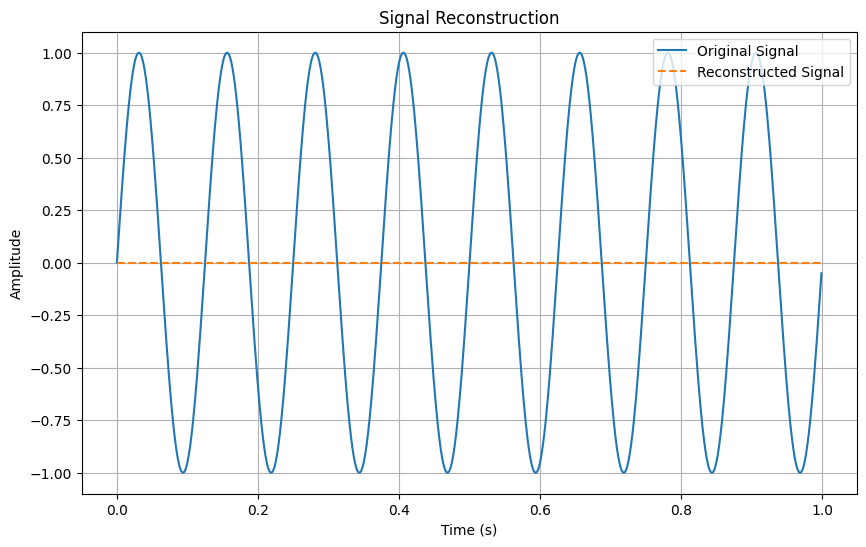

In [33]:
# Reconstructing the signal using high sampling rate
num_samples = 1000
reconstructed_signal = resample(samples, num_samples)

# Plotting the reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', linestyle='--')
plt.title('Signal Reconstruction')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

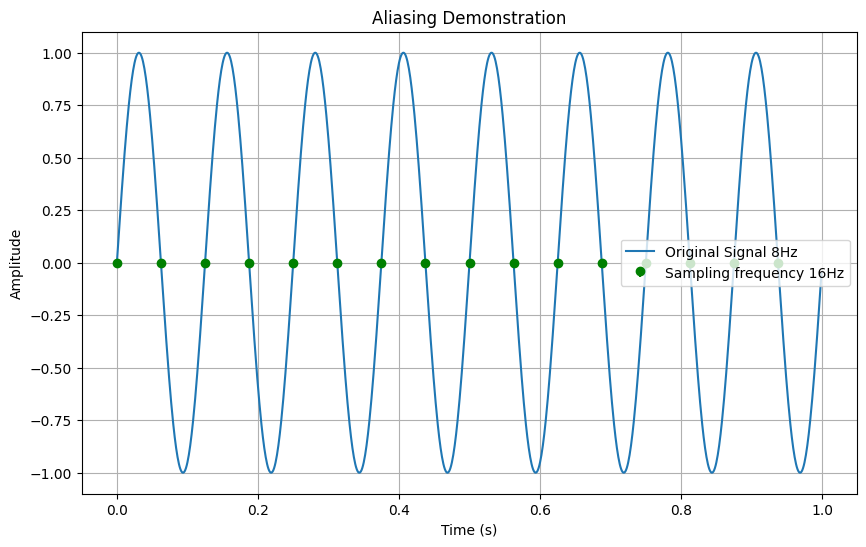

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal 8Hz')
plt.stem(t_sample, samples, linefmt='g-', markerfmt='go', basefmt=" ", label='Sampling frequency 16Hz')
plt.title('Aliasing Demonstration')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## Tradeoff analysis

Threshold | Compression Ratio | Mean Squared Error (Distortion)
----------|-------------------|--------------------------------
       4.0|               3.00|                            0.26
       8.0|               3.00|                            0.26
      12.0|               3.00|                            0.26


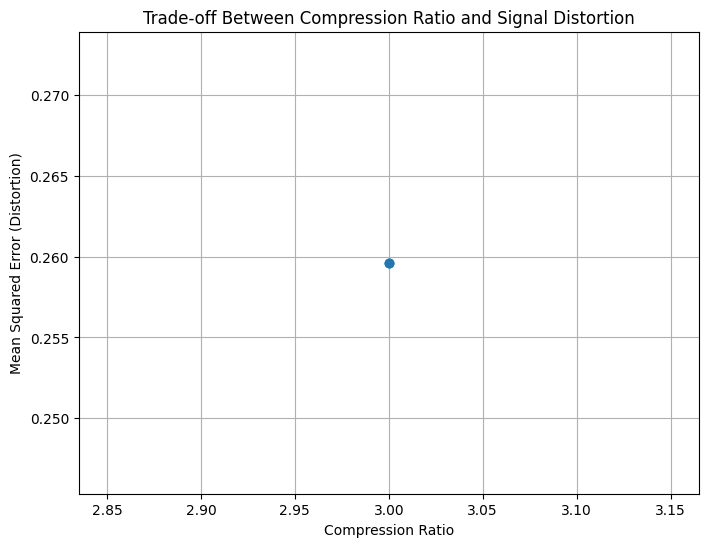

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

signal = np.array([3, 6, 9, 12, 15, 18])
N = len(signal)

# Function for compression, reconstruction, and analysis
def analyze_tradeoff(signal, thresholds):
    original_size = len(signal)
    results = {"thresholds": [], "compression_ratios": [], "distortions": []}

    for threshold in thresholds:
        # Apply DCT
        dct_coeffs = dct(signal, norm='ortho')

        # Apply Thresholding (Compression)
        compressed_coeffs = np.where(abs(dct_coeffs) > threshold, dct_coeffs, 0)

        # Calculate Compression Ratio
        compressed_size = np.count_nonzero(compressed_coeffs)
        compression_ratio = original_size / compressed_size

        # Reconstruct Signal
        reconstructed_signal = idct(compressed_coeffs, norm='ortho')

        # Calculate Distortion (MSE)
        mse = np.mean((signal - reconstructed_signal) ** 2)

        # Store Results
        results["thresholds"].append(threshold)
        results["compression_ratios"].append(compression_ratio)
        results["distortions"].append(mse)

    return results

# Perform Analysis for a Range of Thresholds
thresholds = np.linspace(4,12,3)  # Threshold values
results = analyze_tradeoff(signal, thresholds)

print("Threshold | Compression Ratio | Mean Squared Error (Distortion)")
print("----------|-------------------|--------------------------------")
for i in range(len(thresholds)):
    print(f"{thresholds[i]:10}|{results['compression_ratios'][i]:19.2f}|{results['distortions'][i]:32.2f}")


# Plot Compression Ratio vs. Distortion
plt.figure(figsize=(8, 6))
plt.plot(results["compression_ratios"], results["distortions"], marker='o')
plt.title("Trade-off Between Compression Ratio and Signal Distortion")
plt.xlabel("Compression Ratio")
plt.ylabel("Mean Squared Error (Distortion)")
plt.grid()
plt.show()
